In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tkinter as tk
from tkinter import filedialog

In [3]:
data_dir = "/content/drive/MyDrive/Data Science Capstone Project/DRONE_DATA"

In [4]:
data_dir = pathlib.Path(data_dir)

In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1213


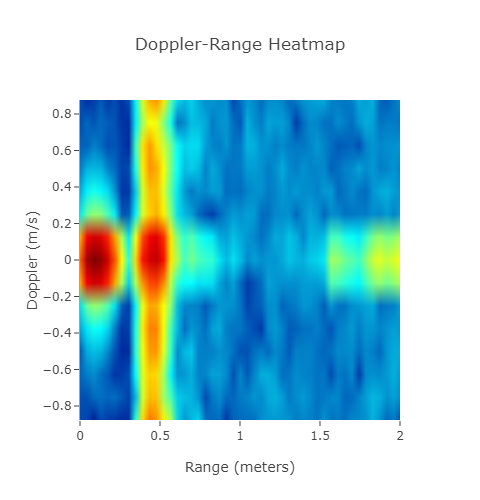

In [6]:
Parrot_Mambo_Fly = list(data_dir.glob('Parrot_Mambo_Fly/*'))
PIL.Image.open(str(Parrot_Mambo_Fly[0]))

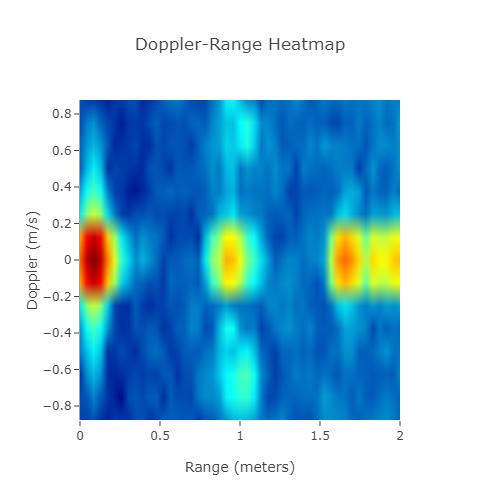

In [7]:
Parrot_Swing = list(data_dir.glob('Parrot_Swing/*'))
PIL.Image.open(str(Parrot_Swing[0]))

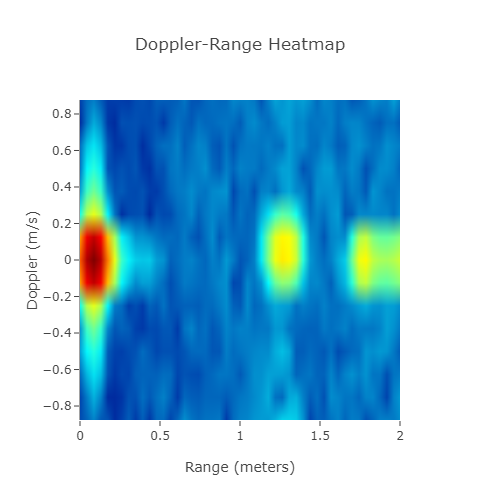

In [8]:
Tello = list(data_dir.glob('Tello/*'))
PIL.Image.open(str(Tello[0]))

In [9]:
batch_size = 20
image_height = 500
image_width = 480

In [10]:
train = tf.keras.preprocessing.image_dataset_from_directory(
                                                            data_dir,
                                                            validation_split = 0.2,
                                                            subset = "training",
                                                            seed = 30,
                                                            image_size = (image_height, image_width),
                                                            batch_size = batch_size
                                                            )

Found 1213 files belonging to 3 classes.
Using 971 files for training.


In [11]:
val = tf.keras.preprocessing.image_dataset_from_directory(
                                                          data_dir,
                                                          validation_split = 0.2,
                                                          subset = "validation",
                                                          seed = 30,
                                                          image_size = (image_height, image_width),
                                                          batch_size = batch_size
                                                          )

Found 1213 files belonging to 3 classes.
Using 242 files for validation.


In [12]:
class_names = train.class_names
class_names

['Parrot_Mambo_Fly', 'Parrot_Swing', 'Tello']

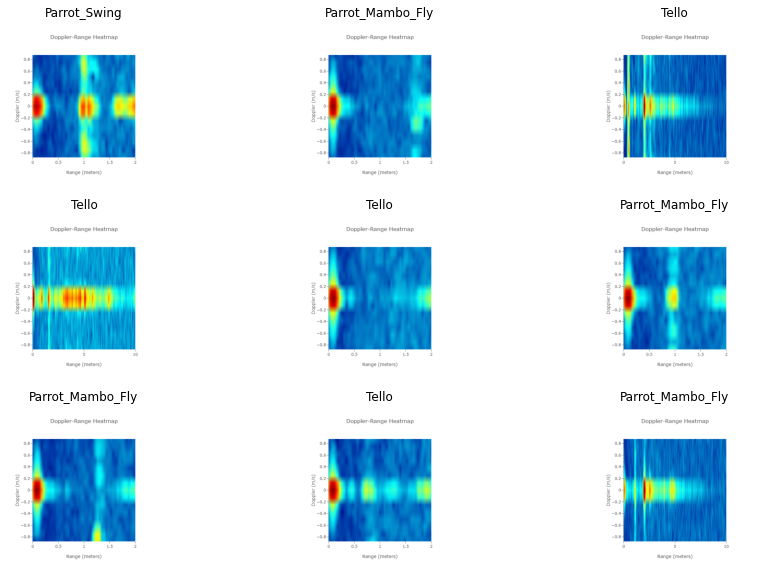

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(30).prefetch(buffer_size = AUTOTUNE)
val = val.cache().prefetch(buffer_size = AUTOTUNE)

In [15]:
n_classes = 3

In [16]:
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (image_height, image_width, 3)),
                    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(n_classes)
                    ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 500, 480, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 500, 480, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 240, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 240, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 120, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 120, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 60, 64)        0

In [18]:
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])

In [19]:
epochs = 5

In [20]:
mymodel = model.fit(train, validation_data = val, epochs = epochs)

Epoch 1/5
49/49 [==============================] - 358s 5s/step - loss: 3.1947 - accuracy: 0.4141 - val_loss: 0.6563 - val_accuracy: 0.7273
Epoch 2/5
49/49 [==============================] - 200s 4s/step - loss: 0.6105 - accuracy: 0.7230 - val_loss: 0.3688 - val_accuracy: 0.8760
Epoch 3/5
49/49 [==============================] - 201s 4s/step - loss: 0.3221 - accuracy: 0.8886 - val_loss: 0.1137 - val_accuracy: 0.9669
Epoch 4/5
49/49 [==============================] - 203s 4s/step - loss: 0.0819 - accuracy: 0.9847 - val_loss: 0.0796 - val_accuracy: 0.9711
Epoch 5/5
49/49 [==============================] - 204s 4s/step - loss: 0.0723 - accuracy: 0.9805 - val_loss: 0.0665 - val_accuracy: 0.9876


In [21]:
acc = mymodel.history["accuracy"]
val_acc = mymodel.history["val_accuracy"]
loss = mymodel.history["loss"]
val_loss = mymodel.history["val_loss"]

In [22]:
epoch_range = range(epochs)

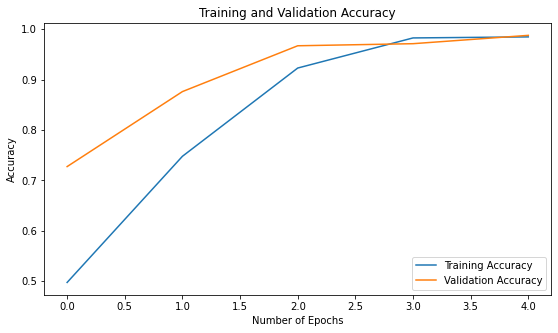

In [23]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label = "Training Accuracy")
plt.plot(epoch_range, val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.savefig("Training and Validation Accuracy_3.png")
plt.show()

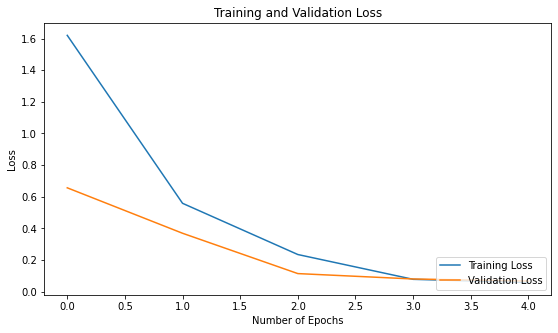

In [24]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label = "Training Loss")
plt.plot(epoch_range, val_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.savefig("Training and Validation Loss_3.png")
plt.show()